<a href="https://colab.research.google.com/github/FarooqBaig/Emotion-Detection/blob/main/CKV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [2]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten

In [3]:
! gdown --id 1HPP0MX4llL2EfgjVZXc8-x0GSe3zjaJh

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1HPP0MX4llL2EfgjVZXc8-x0GSe3zjaJh
To: /content/CKPlus1.zip
100% 112M/112M [00:00<00:00, 139MB/s]


In [4]:
!unzip 'CKPlus1.zip'

Streaming output truncated to the last 5000 lines.
  inflating: CKPlus/modified_images/surprise/surprise_0_9367.jpg  
  inflating: CKPlus/modified_images/surprise/surprise_0_9379.jpg  
  inflating: CKPlus/modified_images/surprise/surprise_0_938.jpg  
  inflating: CKPlus/modified_images/surprise/surprise_0_9383.jpg  
  inflating: CKPlus/modified_images/surprise/surprise_0_9384.jpg  
  inflating: CKPlus/modified_images/surprise/surprise_0_9385.jpg  
  inflating: CKPlus/modified_images/surprise/surprise_0_9386.jpg  
  inflating: CKPlus/modified_images/surprise/surprise_0_9387.jpg  
  inflating: CKPlus/modified_images/surprise/surprise_0_9392.jpg  
  inflating: CKPlus/modified_images/surprise/surprise_0_9393.jpg  
  inflating: CKPlus/modified_images/surprise/surprise_0_9395.jpg  
  inflating: CKPlus/modified_images/surprise/surprise_0_9398.jpg  
  inflating: CKPlus/modified_images/surprise/surprise_0_9399.jpg  
  inflating: CKPlus/modified_images/surprise/surprise_0_94.jpg  
  inflating: C

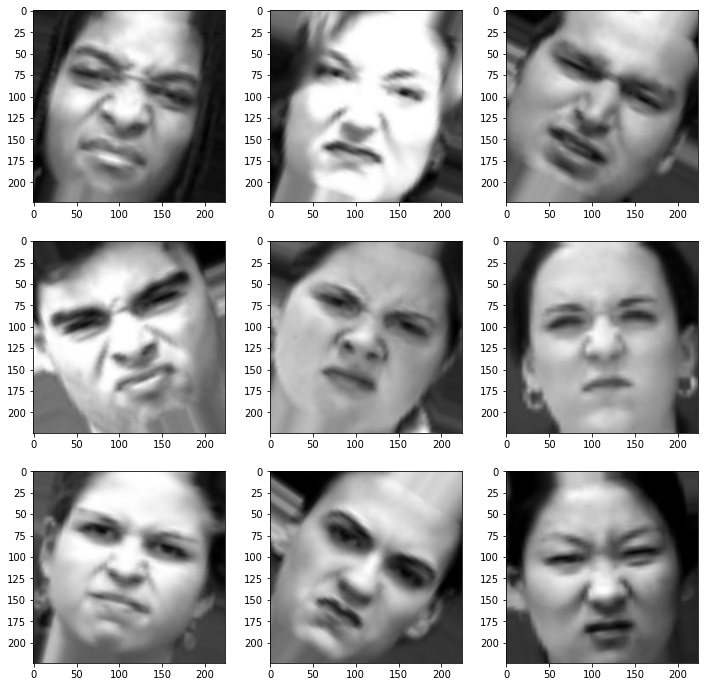

In [6]:
picture_size = 224
folder_path = "CKPlus/"
expression = 'disgust'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

In [7]:
batch_size=128
datagen_train=ImageDataGenerator()
datagen_val=ImageDataGenerator()

train_set= datagen_train.flow_from_directory(folder_path+"train",
                                            target_size=(picture_size,picture_size),
                                            color_mode="grayscale",
                                             batch_size=batch_size,
                                            class_mode="categorical",
                                            shuffle=True)
test_set=datagen_val.flow_from_directory(folder_path+"test",
                                       target_size=(picture_size,picture_size),
                                       color_mode="grayscale",
                                       batch_size=batch_size,
                                       class_mode="categorical",
                                       shuffle=False)

Found 17365 images belonging to 7 classes.
Found 4707 images belonging to 7 classes.


In [8]:
no_of_classes=7

model=Sequential()

model.add(Conv2D(input_shape=(224,224,1),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=7, activation="softmax"))

opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      640       
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [9]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 48

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])

In [10]:
history = model.fit(train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )
                                

Epoch 1/48
135/135 [==============================] - ETA: 0s - loss: 348.3338 - accuracy: 0.2279

135/135 [==============================] - 284s 2s/step - loss: 348.3338 - accuracy: 0.2279 - val_loss: 1.8479 - val_accuracy: 0.2335 - lr: 0.0010
Epoch 2/48
135/135 [==============================] - ETA: 0s - loss: 1.8438 - accuracy: 0.2577

135/135 [==============================] - 243s 2s/step - loss: 1.8438 - accuracy: 0.2577 - val_loss: 1.7875 - val_accuracy: 0.2708 - lr: 0.0010
Epoch 3/48
135/135 [==============================] - ETA: 0s - loss: 1.8507 - accuracy: 0.2493

135/135 [==============================] - 242s 2s/step - loss: 1.8507 - accuracy: 0.2493 - val_loss: 1.8389 - val_accuracy: 0.2335 - lr: 0.0010
Epoch 4/48
135/135 [==============================] - ETA: 0s - loss: 1.8424 - accuracy: 0.2518

135/135 [==============================] - 242s 2s/step - loss: 1.8424 - accuracy: 0.2518 - val_loss: 1.7919 - val_accuracy: 0.2891 - lr: 0.0010
Epoch 5/48
135/135 [==============================] - ETA: 0s - loss: 1.9237 - accuracy: 0.2359Restoring model weights from the end of the best epoch: 2.



Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
135/135 [==============================] - 241s 2s/step - loss: 1.9237 - accuracy: 0.2359 - val_loss: 1.8292 - val_accuracy: 0.2480 - lr: 0.0010
Epoch 5: early stopping


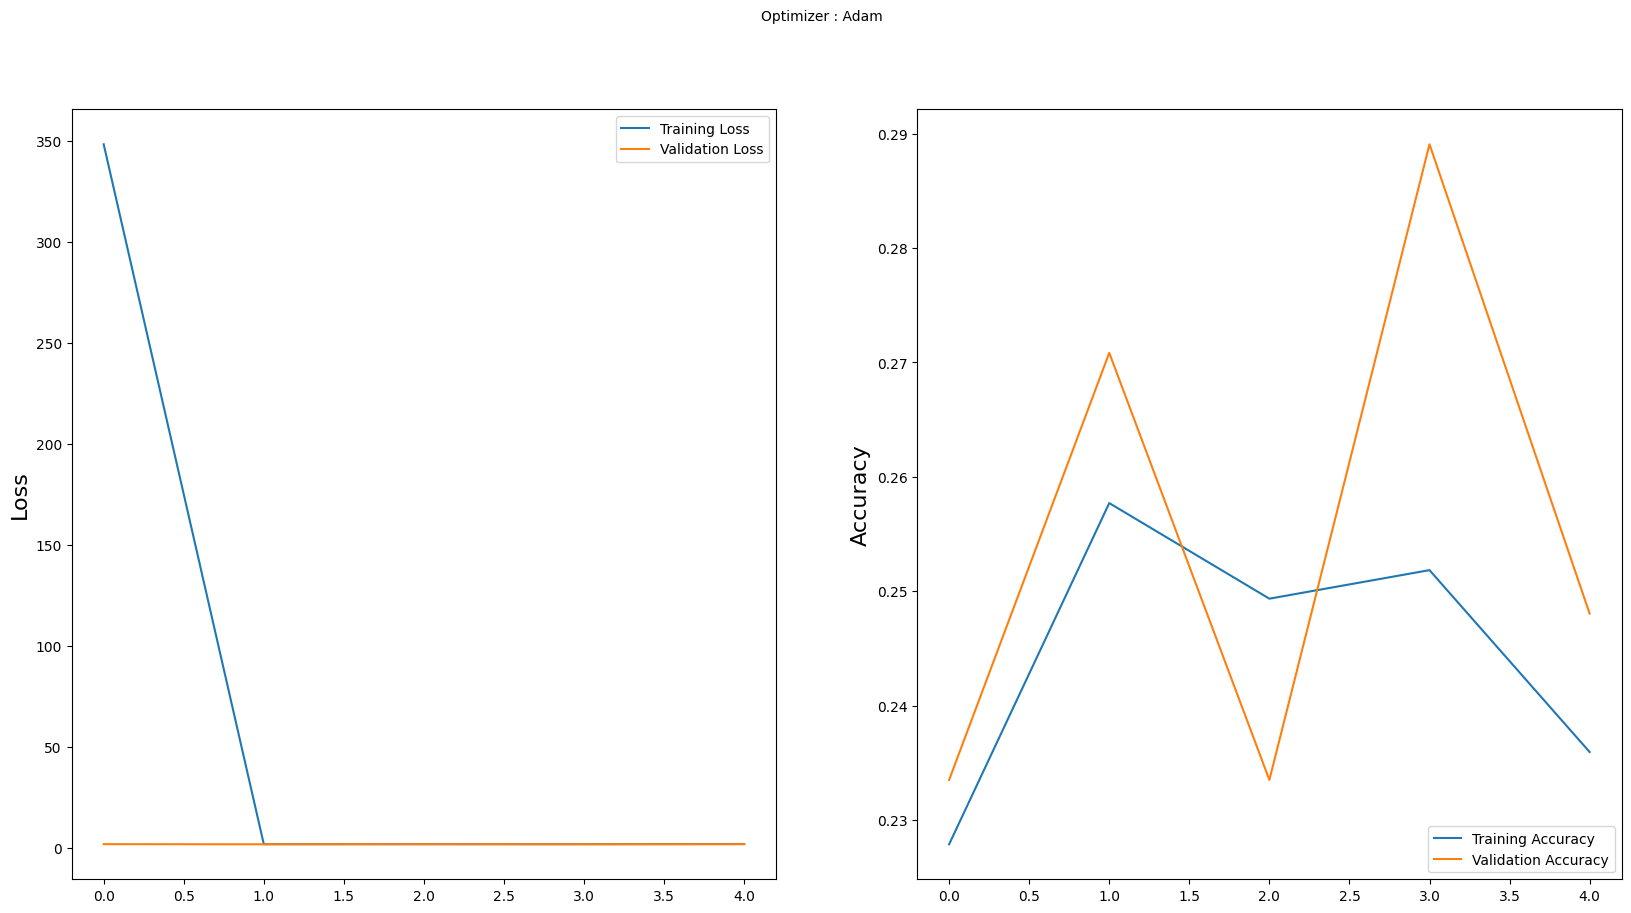

In [11]:
plt.style.use('default')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()